<a href="https://colab.research.google.com/github/diablaxus/Redes-neuronales/blob/main/redunidireccional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Paso 1: Importar las bibliotecas necesarias.


In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

#Paso 2: Cargar el conjunto de datos MNIST.

In [2]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


#Normalizar los valores de píxeles entre 0 y 1.

In [3]:
train_images = train_images / 255.0
test_images = test_images / 255.0

#Paso 3: Construir el modelo unidireccional (FeedForward).

In [4]:
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Aplanar las imágenes 28x28 en vectores de 784 elementos
    layers.Dense(128, activation='relu'),  # Capa densa con 128 neuronas y función de activación ReLU
    layers.Dense(10, activation='softmax') # Capa de salida con 10 neuronas (una por dígito), usando softmax
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


#Paso 4: Compilar el modelo.

In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#Paso 5: Entrenar el modelo.

In [6]:
history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8771 - loss: 0.4339 - val_accuracy: 0.9611 - val_loss: 0.1355
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9645 - loss: 0.1237 - val_accuracy: 0.9702 - val_loss: 0.0988
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9750 - loss: 0.0803 - val_accuracy: 0.9711 - val_loss: 0.0914
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9819 - loss: 0.0615 - val_accuracy: 0.9718 - val_loss: 0.0896
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9855 - loss: 0.0466 - val_accuracy: 0.9779 - val_loss: 0.0765


#Paso 6: Evaluar el modelo.

In [7]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'\nPrecisión en el conjunto de prueba: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9742 - loss: 0.0890

Precisión en el conjunto de prueba: 0.9779000282287598


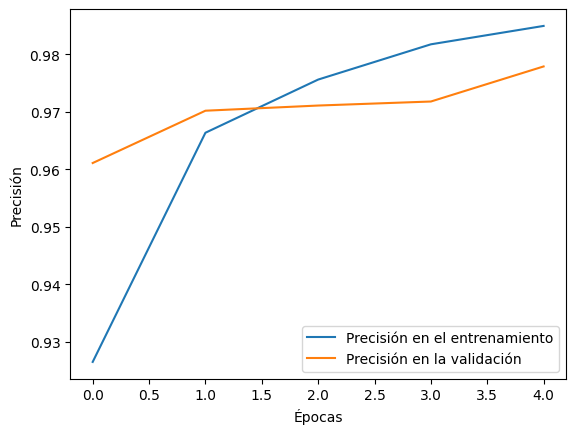

In [8]:
plt.plot(history.history['accuracy'], label='Precisión en el entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión en la validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend(loc='lower right')
plt.show()